In [64]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim.models import Word2Vec

In [2]:
# Path of the final cleaned corpus 
corpuspath = 'D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\clean_text_data\\'
# Reading Final cleand corpus
from nltk.corpus.reader.plaintext import PlaintextCorpusReader
# corpus = PlaintextCorpusReader(corpuspath, '.*')

In [43]:
import nltk
import re
def normalize_corpus(corpus_passed, tokenize=False):
    counter = 0
    document_keys = {}
    normalized_corpus = []    
    for fileid in corpus_passed.fileids():
        
        text = corpus_passed.raw(fileid)
        tokenize_text = corpus_passed.words(fileid)
        filtered_tokens = []
        # removing non alphabatical tokens
        for token in tokenize_text:
            if re.search('[a-zA-Z]', token):
                filtered_tokens.append(token)
        if tokenize:
            
            normalized_corpus.append(filtered_tokens)
        else:
            filtered_text = ' '.join(filtered_tokens)
            normalized_corpus.append(filtered_text)
        document_keys[counter] =  fileid
        counter = counter + 1
        #print('__________________________________________')
        
    # Returning the normalized corpus and the dictonary containing row id and the document name of our courpus    
    return normalized_corpus , document_keys

In [57]:
import nltk
import re
def create_normalized_corpus_and_doccument_ref(corpus_passed, tokenize=False):
    counter = 0
    document_keys = {}
    normalized_corpus = []    
    for fileid in corpus_passed.fileids():
        
        text = corpus_passed.raw(fileid)
        tokenized_text =[]
        if tokenize:
            tokenized_text = list(corpus_passed.words(fileid))
            normalized_corpus.append(tokenized_text)
        else:
            #filtered_text = ' '.join(text)
            normalized_corpus.append(text)
        document_keys[counter] =  fileid
        counter = counter + 1
        #print('__________________________________________')
        
    # Returning the normalized corpus and the dictonary containing row id and the document name of our courpus    
    return normalized_corpus , document_keys

In [12]:
# normalized_corpus_train, row_id_keys_train = normalize_corpus(corpus,tokenize=False)
# normalized_tok_corpus_train, row_id_keys_tok_train = normalize_corpus(corpus,tokenize=True)


In [102]:
corpus

NameError: name 'corpus' is not defined

In [ ]:
def tfidf_wtd_avg_document_vectors(normalized_tokenized_corpus):
    for document in normalized_tokenized_corpus:
        document_vector = model.dv[document]

In [25]:
# modelw2v.wv.most_similar("rajitha")

In [31]:
import numpy as np
def vectorize_data_sparce(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features


In [32]:
vectorized_docs = vectorize_data_sparce(normalized_tok_corpus_train, model=modelw2v)
len(vectorized_docs), len(vectorized_docs[0])

(2590, 100)

In [60]:
def build_feature_matrix(documents, feature_type='tfidf', ngram_range=(1, 1), min_df=1, max_df=0.85):
    # max_df = 0.50 means "ignore terms that appear in more than 50% of the documents".
    # max_df = 25 means "ignore terms that appear in more than 25 documents".
    # default max_df is 1.0, which means "ignore terms that appear in more than 100% of the documents". 
    # Thus, the default setting does not ignore any terms.
    
    # min_df = 0.01 means "ignore terms that appear in less than 1% of the documents".
    # min_df = 5 means "ignore terms that appear in less than 5 documents".
    # default min_df is 1, which means "ignore terms that appear in less than 1 document". 
    # Thus, the default setting does not ignore any terms.
    
    # We are setting max df to 85%
    # We are setting min df to 0.01% 
    
    feature_type = feature_type.lower().strip()  
    if feature_type == 'tfidf':
        vectorizer = TfidfVectorizer(min_df=min_df, max_df=max_df,  ngram_range=ngram_range)
    else:
        raise Exception("Wrong feature type entered. Possible values: 'binary', 'frequency', 'tfidf'")
    feature_matrix = vectorizer.fit_transform(documents).astype(float)
    
    return vectorizer, feature_matrix

In [36]:
# Extract (tf-idf) features
tfidf_vectorizer, tfidf_feature_matrix = build_feature_matrix(normalized_corpus,
                                                  feature_type='tfidf',
                                                  min_df=0.01, 
                                                  max_df=0.85,
                                                  ngram_range=(1, 1))

In [39]:
from sklearn.cluster import KMeans
def k_means(feature_matrix, num_clusters,max_iter=300):
    km = KMeans(n_clusters=num_clusters,init='k-means++', random_state=42, max_iter=max_iter)
    km.fit(feature_matrix)
    clusters = km.labels_
    return km, clusters


In [40]:
# for gensim
kmeanModel_d2v, clusters = k_means(feature_matrix=vectorized_docs, num_clusters=8,max_iter=100)

In [41]:
def run_kmeans_for_elbow(iterations = 300):
    distortions = []
    for k in K: 
        km_obj, clusters = k_means(feature_matrix=train_feature_matrix, num_clusters=k, max_iter=iterations)
        # inertia_ is the distance from each sample to the centroid.
        distortions.append(km_obj.inertia_)
    return distortions


array([2, 6, 6, ..., 5, 6, 6])

In [80]:
kmeanModel_d2v.predict(vectorized_docs)

array([0, 1, 6, ..., 0, 6, 5])

In [85]:
test_doc = ['Hello I am regarding the sport football. i play football. Byee']

In [3]:
testcorpuspath = 'D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\unclean_text_data_test\\'
testcorpus = PlaintextCorpusReader(testcorpuspath, '.*' , )

In [67]:
normalized_tokenized_corpus_test, row_id_keys_tokenized_test = normalize_corpus(testcorpus,tokenize=False)
normalized_tokenized_corpus_test2, row_id_keys_tokenized_test2 = create_normalized_corpus_and_doccument_ref(testcorpus,tokenize=True)

In [69]:
print(normalized_tokenized_corpus_test[1])
print(normalized_tokenized_corpus_test2[1])
print('______________________')
print(len(normalized_tokenized_corpus_test[1]))
print(len(normalized_tokenized_corpus_test2[1]))
print('______________________')
print(type(normalized_tokenized_corpus_test[1]))
print(type(normalized_tokenized_corpus_test2[1]))

            JavaScript is not available.  We’ve detected that JavaScript is disabled in this browser. Please enable JavaScript or switch to a supported browser to continue using twitter.com. You can see a list of supported browsers in our Help Center.  Help Center   Terms of Service  Privacy Policy  Cookie Policy  Imprint  Ads info © 2022 Twitter, Inc.   Something went wrong, but don’t fret — let’s give it another shot.
['JavaScript', 'is', 'not', 'available', '.', 'We', '’', 've', 'detected', 'that', 'JavaScript', 'is', 'disabled', 'in', 'this', 'browser', '.', 'Please', 'enable', 'JavaScript', 'or', 'switch', 'to', 'a', 'supported', 'browser', 'to', 'continue', 'using', 'twitter', '.', 'com', '.', 'You', 'can', 'see', 'a', 'list', 'of', 'supported', 'browsers', 'in', 'our', 'Help', 'Center', '.', 'Help', 'Center', 'Terms', 'of', 'Service', 'Privacy', 'Policy', 'Cookie', 'Policy', 'Imprint', 'Ads', 'info', '©', '2022', 'Twitter', ',', 'Inc', '.', 'Something', 'went', 'wrong', ',', 'bu

In [65]:
tfidf_vectorizer, tfidf_feature_matrix = build_feature_matrix(normalized_tokenized_corpus_test,
                                                  feature_type='tfidf',
                                                  min_df=0.01, 
                                                  max_df=0.85,
                                                  ngram_range=(1, 1))

In [66]:
tfidf_feature_matrix

<43x3499 sparse matrix of type '<class 'numpy.float64'>'
	with 10210 stored elements in Compressed Sparse Row format>

In [101]:
tfidf_feature_matrix

<43x3499 sparse matrix of type '<class 'numpy.float64'>'
	with 10210 stored elements in Compressed Sparse Row format>

In [70]:
# For Gensim, We need to have our corpus normalized
data = [d for d in normalized_tokenized_corpus_test2]
def tagged_document(list_of_list_of_words):
    for i, list_of_words in enumerate(list_of_list_of_words):
        yield TaggedDocument(list_of_words, [i])

data_for_training = list(tagged_document(data))

In [72]:
len(data_for_training)

43

In [ ]:
# Doc2Vec(corpus.paras(), vector_size=1000, window=2, min_count=50, sample=1e-3)
# model = Doc2Vec(data_for_training, vector_size=100, min_count=10, epochs=30,sample=1e-3)

In [ ]:
# modelw2v = Word2Vec(sentences=normalized_tok_corpus_train, vector_size=100, workers=1, seed=42)

In [73]:
w2m = Word2Vec(sentences=normalized_tokenized_corpus_test2, vector_size=100, workers=1, seed=42)

In [75]:
w2m

In [ ]:
# vectorized_docs = vectorize_data_sparce(normalized_tok_corpus_train, model=modelw2v)
# len(vectorized_docs), len(vectorized_docs[0])

In [76]:
import numpy as np
def vectorize_data_sparce(list_of_docs, model):
    """Generate vectors for list of documents using a Word Embedding

    Args:
        list_of_docs: List of documents
        model: Gensim's Word Embedding

    Returns:
        List of document vectors
    """
    features = []

    for tokens in list_of_docs:
        zero_vector = np.zeros(model.vector_size)
        vectors = []
        for token in tokens:
            # Checking 
            if token in model.wv:
                try:
                    vectors.append(model.wv[token])
                except KeyError:
                    continue
        if vectors:
            vectors = np.asarray(vectors)
            avg_vec = vectors.mean(axis=0)
            features.append(avg_vec)
        else:
            features.append(zero_vector)
    return features

In [77]:
vectorized_docs = vectorize_data_sparce(normalized_tokenized_corpus_test2, model=w2m)
len(vectorized_docs), len(vectorized_docs[0])

(43, 100)

In [83]:
vectorized_docs_test = vectorize_data_sparce()

In [86]:
# vectorized_docs2 = tfidf_wtd_avg_document_vectors(normalized_tokenized_corpus_test2, model=w2m)

In [87]:
# vectorized_docs

In [89]:
test_data = ['hay','thisis','unseen','fuckk;slakd;ask;dk;a;lkl;k','kdjflskdjflksjdkj','lksdklasjd']

In [ ]:
# normalized_tokenized_corpus_test_unseen, row_id_keys_tokenized_test_unseen = 
#     create_normalized_corpus_and_doccument_ref(testcorpus,tokenize=True)

In [91]:
vectorized_docs_test = vectorize_data_sparce(test_data, model=w2m)

6

[[['JavaScript', 'is', 'not', 'available', '.'],
  ['We',
   '’',
   've',
   'detected',
   'that',
   'JavaScript',
   'is',
   'disabled',
   'in',
   'this',
   'browser',
   '.'],
  ['Please',
   'enable',
   'JavaScript',
   'or',
   'switch',
   'to',
   'a',
   'supported',
   'browser',
   'to',
   'continue',
   'using',
   'twitter',
   '.',
   'com',
   '.'],
  ['You',
   'can',
   'see',
   'a',
   'list',
   'of',
   'supported',
   'browsers',
   'in',
   'our',
   'Help',
   'Center',
   '.'],
  ['Help',
   'Center',
   'Terms',
   'of',
   'Service',
   'Privacy',
   'Policy',
   'Cookie',
   'Policy',
   'Imprint',
   'Ads',
   'info',
   '©',
   '2022',
   'Twitter',
   ',',
   'Inc',
   '.',
   'Something',
   'went',
   'wrong',
   ',',
   'but',
   'don',
   '’',
   't',
   'fret',
   '—',
   'let',
   '’',
   's',
   'give',
   'it',
   'another',
   'shot',
   '.']],
 [['JavaScript', 'is', 'not', 'available', '.'],
  ['We',
   '’',
   've',
   'detected',
   'th

In [77]:
vectorized_docs_test = vectorize_data_sparce(normalized_tok_corpus_test, model=modelw2v)
len(vectorized_docs_test), len(vectorized_docs_test[0])

(61, 100)

In [78]:
kmeanModel_d2v.fit_predict(vectorized_docs_test)

array([0, 0, 1, 4, 0, 6, 0, 0, 0, 4, 0, 6, 0, 0, 0, 4, 0, 0, 0, 6, 0, 1,
       6, 3, 2, 0, 5, 2, 2, 6, 5, 0, 7, 1, 0, 0, 6, 6, 0, 0, 0, 1, 0, 6,
       2, 0, 0, 2, 6, 0, 0, 6, 2, 0, 0, 0, 2, 2, 2, 7, 0])

In [114]:
# model = Word2Vec.load("word2vec.model")

In [64]:
K = range(15,40)

def run_kmeans_for_elbow(iterations = 300):
    distortions = []
    for k in K: 
        km_obj, clusters = k_means(feature_matrix=vectorized_docs, num_clusters=k, max_iter=iterations)
        # inertia_ is the distance from each sample to the centroid.
        distortions.append(km_obj.inertia_)
    return distortions
k_results = run_kmeans_for_elbow()

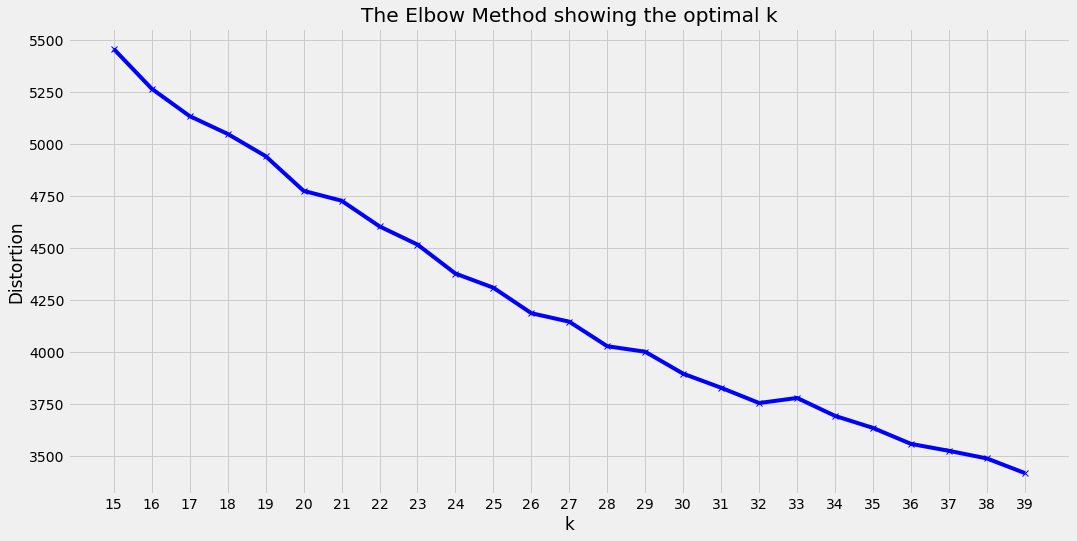

In [65]:
# Ploting k means results for different k values
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(K, k_results, 'bx-')
plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

array([ 0.2641546 , -0.15123755, -0.20052224, -0.22149482, -0.197646  ,
        0.0360399 ,  0.20178646,  0.25427788,  0.24580863,  0.05959991,
       -0.5125192 ,  0.20113182,  0.26487082,  0.08195835, -0.08406524,
       -0.6330811 ,  0.19896382, -0.13615486, -0.02456386,  0.15947054,
       -0.07816042,  0.23895279,  0.2623232 ,  0.07615492,  0.8171822 ,
       -0.35469812, -0.4559547 ,  0.47490874, -0.34143233, -0.22635421,
        0.01045352, -0.10243035,  0.06873608, -0.06332538,  0.33789596,
       -0.19343416,  0.09897224, -0.5377745 , -0.04995612,  0.5080601 ,
        0.38455534, -0.05087406, -0.03634645, -0.15547058,  0.17426573,
        0.12162033, -0.1974737 ,  0.36376026,  0.31476155, -0.17220108,
       -0.24675842, -0.60168386, -0.21937382,  0.11973301,  0.28866586,
        0.10208888, -0.09666725,  0.1358457 , -0.2255934 ,  0.7228475 ,
       -0.37178153,  0.50290185, -0.01465061, -0.3458498 ,  0.19655235,
       -0.01430477, -0.08228303, -0.07852344, -0.13274713,  0.11

In [84]:
from gensim.test.utils import get_tmpfile
fname = get_tmpfile("D:\\Personal\\Msc\\CMM706 Text Analytics\\Coursework\\my_doc2vec_model")
# model.save(fname)
d2vmodel = Doc2Vec.load(fname)

In [86]:
vectorized_docs_test2 = vectorize_data_sparce(normalized_tok_corpus_test, model=d2vmodel)
len(vectorized_docs_test), len(vectorized_docs_test[0])

(61, 100)

In [89]:
def run_kmeans_for_elbow(iterations = 300):
    distortions = []
    for k in K: 
        km_obj, clusters = k_means(feature_matrix=vectorized_docs_test2, num_clusters=k, max_iter=iterations)
        # inertia_ is the distance from each sample to the centroid.
        distortions.append(km_obj.inertia_)
    return distortions
k_results = run_kmeans_for_elbow()

C:\Users\rajithafe\AppData\Local\Temp\ipykernel_19016\2991528198.py:4: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (19). Possibly due to duplicate points in X.
  km.fit(feature_matrix)
C:\Users\rajithafe\AppData\Local\Temp\ipykernel_19016\2991528198.py:4: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (20). Possibly due to duplicate points in X.
  km.fit(feature_matrix)
C:\Users\rajithafe\AppData\Local\Temp\ipykernel_19016\2991528198.py:4: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (21). Possibly due to duplicate points in X.
  km.fit(feature_matrix)
C:\Users\rajithafe\AppData\Local\Temp\ipykernel_19016\2991528198.py:4: ConvergenceWarning: Number of distinct clusters (18) found smaller than n_clusters (22). Possibly due to duplicate points in X.
  km.fit(feature_matrix)
C:\Users\rajithafe\AppData\Local\Temp\ipykernel_19016\2991528198.py:4: ConvergenceWarning: Number of dis

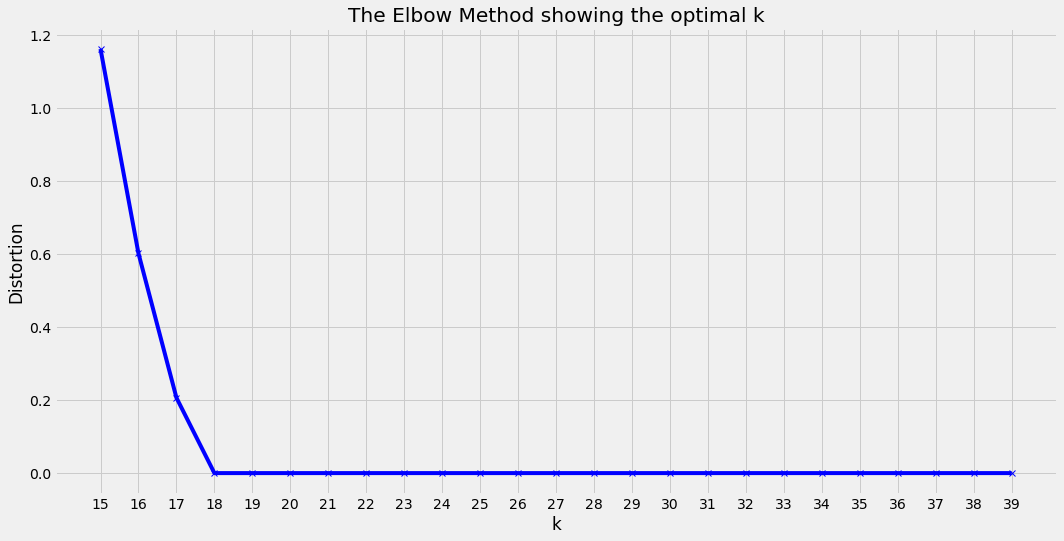

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use('fivethirtyeight')
plt.figure(figsize=(16,8))
plt.plot(K, k_results, 'bx-')
plt.xticks(K)
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()